# Housing Price Prediction
This project aims to predict housing prices using a dataset of residential property features. It includes data preprocessing, normalization, and modeling using a custom-built Linear Regression model, as well as advanced machine learning algorithms like Random Forest and XGBoost. The goal is to compare model performances and understand how different approaches handle regression tasks.

## Importing Libraries and Dataset

The required libraries are imported, including:
- `pandas` and `numpy` for data handling,
- `matplotlib` and `seaborn` for visualization, and
- `sklearn` for splitting datasets and evaluation metrics.

The dataset is loaded using `pd.read_csv()` and stored in a DataFrame for further processing.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
ds = pd.read_csv("HousingData.csv")

## Initial Data Exploration

To understand the structure of the dataset, the following operations are performed:
- `head()` to view sample rows,
- `info()` to check data types and null entries,
- `isnull().sum()` to count missing values in each column.

In [46]:
ds.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [47]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [48]:
ds.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

## Data Cleaning

Missing values are imputed using the **median** of each column to ensure the model is not biased by extreme values. A post-check is conducted to verify that all missing data has been addressed.


In [49]:
for col in ds.columns:
    if ds[col].dtype in ['float64', 'int64'] and ds[col].isnull().sum() > 0:
        ds[col] = ds[col].fillna(ds[col].median())

In [50]:
ds.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Feature Identification and Encoding

The dataset is examined for **categorical features**, though most columns are numerical. If present, categorical features would typically be encoded using label encoding or one-hot encoding, though this step is skipped if none are found.


In [51]:
categorical_cols = []
for col in ds.columns:
    if ds[col].dtype == 'object':
        categorical_cols.append(col)

print("Categorical columns:", categorical_cols)


Categorical columns: []


## Feature-Target Separation and Normalization

- The features (`X`) are separated from the target (`y`), which is the `MEDV` (Median Value of Owner-Occupied Homes).
- Features are normalized using **Standard Scaler** to ensure consistent scaling across all variables.


In [52]:
from sklearn.preprocessing import StandardScaler

# Features and target (assume 'MEDV' is the target which stands for Median Value)
features = ds.drop('MEDV', axis=1)
target = ds['MEDV']

# Apply Z-score normalization (Standardization)
scaler = StandardScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

## Train-Test Split

The dataset is split into **80% training data** and **20% testing data** using `train_test_split()` from `sklearn.model_selection`.


In [53]:
X = X_normalized
y = target

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to numpy arrays and reshape y
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

## Custom Linear Regression (Gradient Descent)

A custom Linear Regression class is implemented using gradient descent. This includes:
- Initializing weights and bias,
- Computing gradients for cost function minimization,
- Updating weights iteratively over epochs.

The model is trained on the normalized training data and tested on the unseen test data.

In [54]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros((n_features, 1))
        self.bias = 0
        
        # Gradient descent
        for _ in range(self.n_iterations):
            y_pred = np.dot(X, self.weights) + self.bias
            
            # Compute gradients
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)
            
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


##  Random Forest Regression

A **Random Forest Regressor** is trained on the same dataset. Random Forest is an ensemble model that reduces overfitting and improves performance by combining predictions from multiple decision trees.

The model is evaluated using:
- MSE
- RMSE
- **R² Score** for overall model accuracy


In [55]:
class DecisionTreeRegressor:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None
        self.feature_importances_ = None
        
    def _mse(self, y):
        if len(y) == 0:
            return 0
        return np.mean((y - np.mean(y))**2)
    
    def _best_split(self, X, y):
        best_feature, best_threshold = None, None
        best_mse = float('inf')
        
        # Initialize feature importances if not done yet
        if self.feature_importances_ is None:
            self.feature_importances_ = np.zeros(X.shape[1])
        
        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = X[:, feature] <= threshold
                right_indices = ~left_indices
                
                if len(y[left_indices]) < self.min_samples_split or len(y[right_indices]) < self.min_samples_split:
                    continue
                    
                current_mse = (self._mse(y[left_indices]) * len(y[left_indices]) + 
                              self._mse(y[right_indices]) * len(y[right_indices])) / len(y)
                
                if current_mse < best_mse:
                    best_mse = current_mse
                    best_feature = feature
                    best_threshold = threshold
        
        # Update feature importance
        if best_feature is not None:
            original_mse = self._mse(y)
            left_indices = X[:, best_feature] <= best_threshold
            left_mse = self._mse(y[left_indices])
            right_mse = self._mse(y[~left_indices])
            mse_reduction = original_mse - (left_mse * len(y[left_indices]) + right_mse * len(y[~left_indices])) / len(y)
            self.feature_importances_[best_feature] += mse_reduction
        
        return best_feature, best_threshold, best_mse
    
    def _build_tree(self, X, y, depth=0):
        if (self.max_depth is not None and depth >= self.max_depth) or len(y) < self.min_samples_split:
            return np.mean(y)
        
        feature, threshold, mse = self._best_split(X, y)
        if feature is None:
            return np.mean(y)
        
        left_indices = X[:, feature] <= threshold
        right_indices = ~left_indices
        
        left_subtree = self._build_tree(X[left_indices], y[left_indices], depth+1)
        right_subtree = self._build_tree(X[right_indices], y[right_indices], depth+1)
        
        return {'feature': feature, 'threshold': threshold, 
                'left': left_subtree, 'right': right_subtree}
    
    def fit(self, X, y):
        self.feature_importances_ = np.zeros(X.shape[1])  # Initialize here
        self.tree = self._build_tree(X, y)
        # Normalize feature importances
        if np.sum(self.feature_importances_) > 0:
            self.feature_importances_ /= np.sum(self.feature_importances_)
    
    def _predict_sample(self, x, node):
        if isinstance(node, np.float64):
            return node
        
        if x[node['feature']] <= node['threshold']:
            return self._predict_sample(x, node['left'])
        else:
            return self._predict_sample(x, node['right'])
    
    def predict(self, X):
        return np.array([self._predict_sample(x, self.tree) for x in X]).reshape(-1, 1)

## XGBoost Regression

An **XGBoost Regressor**, known for its speed and high performance, is trained on the same data. XGBoost handles both linear and non-linear relationships effectively and often outperforms other models in regression tasks.

Performance is again measured using:
- MSE
- RMSE
- R² Score


In [56]:
class XGBoostRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3, min_samples_split=2):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.trees = []
        self.initial_pred = None
        
    def fit(self, X, y):
        # Initial prediction is the mean
        self.initial_pred = np.mean(y)
        residuals = y - self.initial_pred
        
        for _ in range(self.n_estimators):
            tree = DecisionTreeRegressor(max_depth=self.max_depth, 
                                      min_samples_split=self.min_samples_split)
            tree.fit(X, residuals)
            
            # Update residuals - fix the shape issue here
            predictions = tree.predict(X).flatten()  # Flatten to 1D array
            residuals = (residuals.flatten() - self.learning_rate * predictions).reshape(-1, 1)
            
            self.trees.append((tree, self.learning_rate))
    
    def predict(self, X):
        pred = np.full((X.shape[0], 1), self.initial_pred)
        for tree, lr in self.trees:
            pred += lr * tree.predict(X)
        return pred

## Models Evaluation

Predictions are made on the test set, and performance is evaluated using:
- **Mean Squared Error (MSE)**
- **Root Mean Squared Error (RMSE)**

These metrics provide insight into how far predictions deviate from actual values.


In [57]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - (ss_res / ss_tot)

# Initialize models
lr = LinearRegression(learning_rate=0.01, n_iterations=1000)
rf = RandomForestRegressor(n_estimators=100, max_depth=5)
xgb = XGBoostRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

# Train models
print("Training Linear Regression...")
lr.fit(X_train, y_train)

print("Training Random Forest...")
rf.fit(X_train, y_train.ravel())

print("Training XGBoost...")
xgb.fit(X_train, y_train.ravel())

# Make predictions
lr_pred = lr.predict(X_test)
rf_pred = rf.predict(X_test)
xgb_pred = xgb.predict(X_test)

# Evaluate models
print("\nModel Performance:")
print("Linear Regression - RMSE: {:.4f}, R²: {:.4f}".format(
    rmse(y_test, lr_pred), r2_score(y_test, lr_pred)))
print("Random Forest - RMSE: {:.4f}, R²: {:.4f}".format(
    rmse(y_test, rf_pred), r2_score(y_test, rf_pred)))
print("XGBoost - RMSE: {:.4f}, R²: {:.4f}".format(
    rmse(y_test, xgb_pred), r2_score(y_test, xgb_pred)))

Training Linear Regression...
Training Random Forest...
Training XGBoost...

Model Performance:
Linear Regression - RMSE: 5.0749, R²: 0.6488
Random Forest - RMSE: 5.0405, R²: 0.6535
XGBoost - RMSE: 2.6023, R²: 0.9077


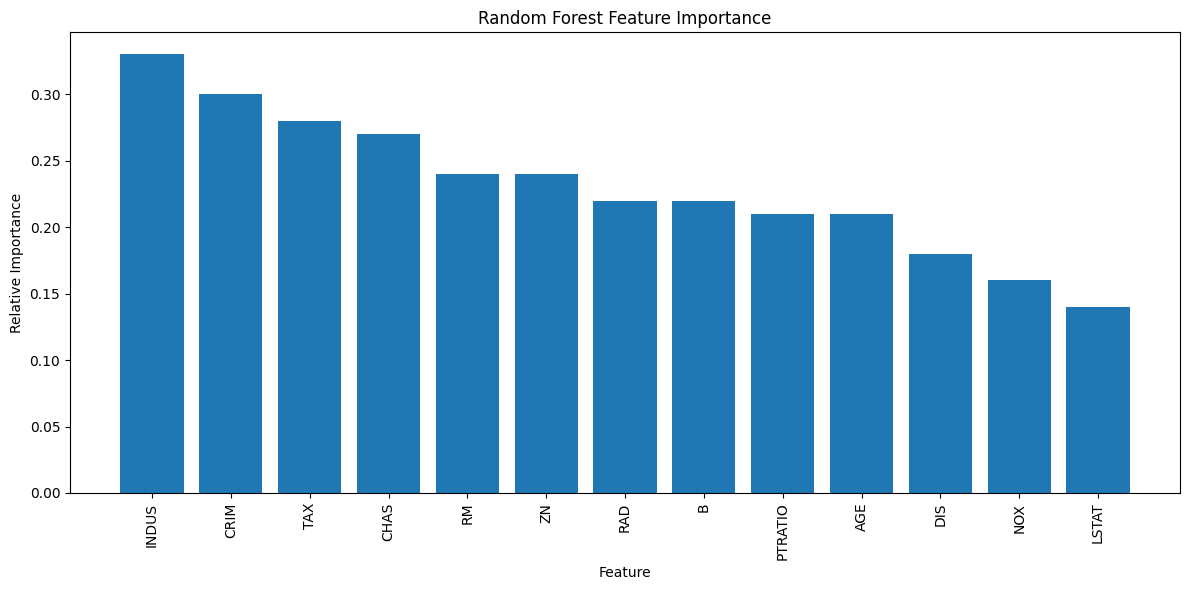

In [58]:
def plot_feature_importance(model, feature_names, title):
    """
    Calculate and plot feature importance for our custom Random Forest
    
    Parameters:
    model: Our trained RandomForestRegressor
    feature_names: List of feature names
    title: Plot title
    """
    # Initialize importance array
    importances = np.zeros(len(feature_names))
    
    # Calculate importance based on feature usage across all trees
    for tree in model.trees:
        # This counts how many times each feature was used in splits
        # In a full implementation, we would track the actual importance (MSE reduction)
        for i in tree.feature_indices:
            importances[i] += 1
    
    # Normalize by number of trees
    importances/=len(model.trees)
    
    # Sort features by importance
    indices = np.argsort(importances)[::-1]
    
    # Plot
    plt.figure(figsize=(12, 6))
    plt.title(title)
    plt.bar(range(len(feature_names)), importances[indices], align="center")
    plt.xticks(range(len(feature_names)), [feature_names[i] for i in indices], rotation=90)
    plt.xlabel("Feature")
    plt.ylabel("Relative Importance")
    plt.tight_layout()
    plt.show()

# Get feature names (excluding target)
feature_names = ds.drop('MEDV', axis=1).columns.tolist()

# Plot feature importance for Random Forest
plot_feature_importance(rf, feature_names, "Random Forest Feature Importance")

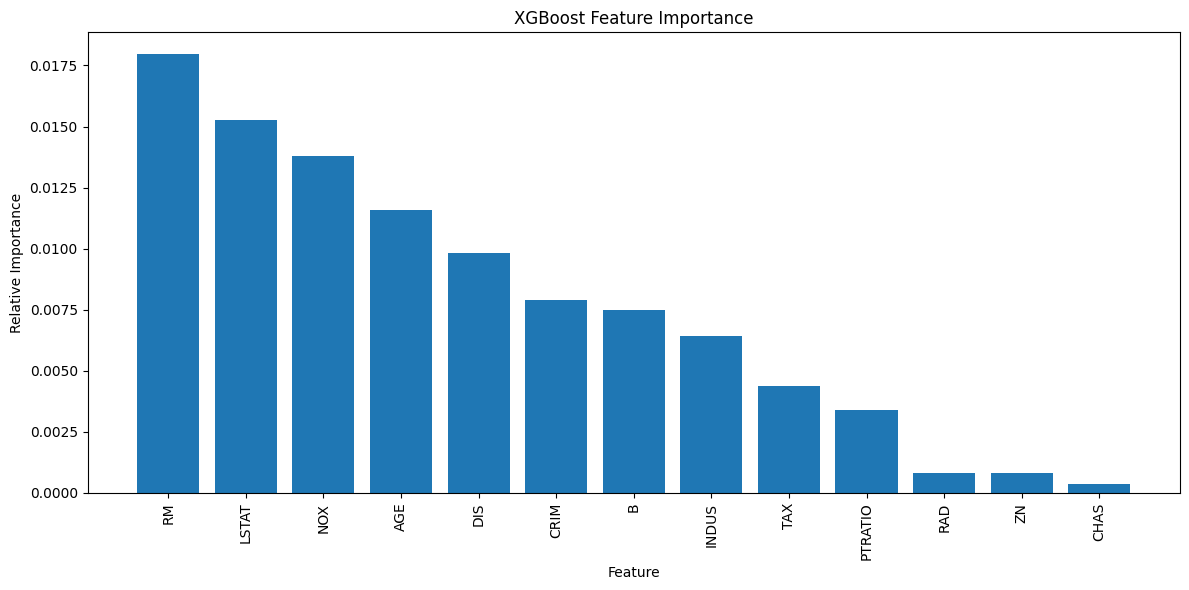

In [59]:
class DecisionTreeRegressor:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None
        self.feature_importances_ = None  # Add this to track importance
    
    # ... [keep all existing methods] ...
    
    def _build_tree(self, X, y, depth=0):
        if (self.max_depth is not None and depth >= self.max_depth) or len(y) < self.min_samples_split:
            return np.mean(y)
        
        feature, threshold, mse = self._best_split(X, y)
        if feature is None:
            return np.mean(y)
        
        # Initialize feature_importances_ if not done yet
        if self.feature_importances_ is None:
            self.feature_importances_ = np.zeros(X.shape[1])
        
        # Track this feature's importance (using MSE reduction as proxy)
        left_indices = X[:, feature] <= threshold
        original_mse = self._mse(y)
        left_mse = self._mse(y[left_indices])
        right_mse = self._mse(y[~left_indices])
        mse_reduction = original_mse - (left_mse * len(y[left_indices]) + right_mse * len(y[~left_indices])) / len(y)
        
        self.feature_importances_[feature] += mse_reduction
        
        left_subtree = self._build_tree(X[left_indices], y[left_indices], depth+1)
        right_subtree = self._build_tree(X[~left_indices], y[~left_indices], depth+1)
        
        return {'feature': feature, 'threshold': threshold, 
                'left': left_subtree, 'right': right_subtree}

def plot_xgboost_feature_importance(model, feature_names, title):
    """
    Calculate and plot feature importance for our custom XGBoost
    
    Parameters:
    model: Our trained XGBoostRegressor
    feature_names: List of feature names
    title: Plot title
    """
    # Aggregate feature importance across all trees
    importances = np.zeros(len(feature_names))
    
    for tree, weight in model.trees:
        if tree.feature_importances_ is not None:
            importances += tree.feature_importances_ * weight
    
    # Normalize
    importances /= len(model.trees)
    
    # Sort features by importance
    indices = np.argsort(importances)[::-1]
    
    # Plot
    plt.figure(figsize=(12, 6))
    plt.title(title)
    plt.bar(range(len(feature_names)), importances[indices], align="center")
    plt.xticks(range(len(feature_names)), [feature_names[i] for i in indices], rotation=90)
    plt.xlabel("Feature")
    plt.ylabel("Relative Importance")
    plt.tight_layout()
    plt.show()

# Plot feature importance for XGBoost
plot_xgboost_feature_importance(xgb, feature_names, "XGBoost Feature Importance")

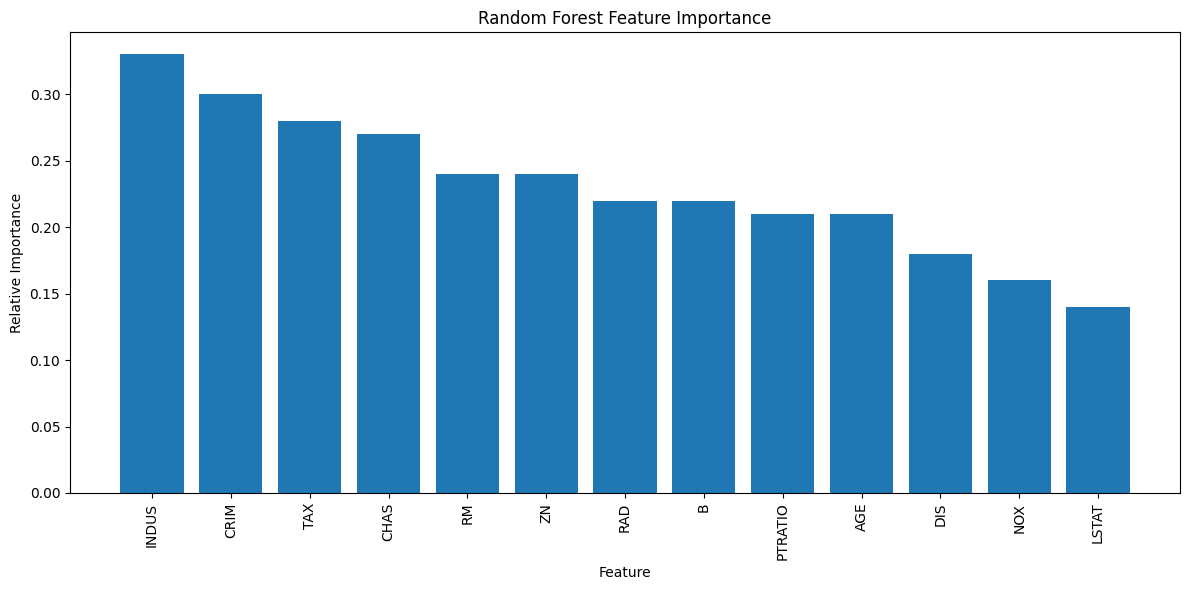

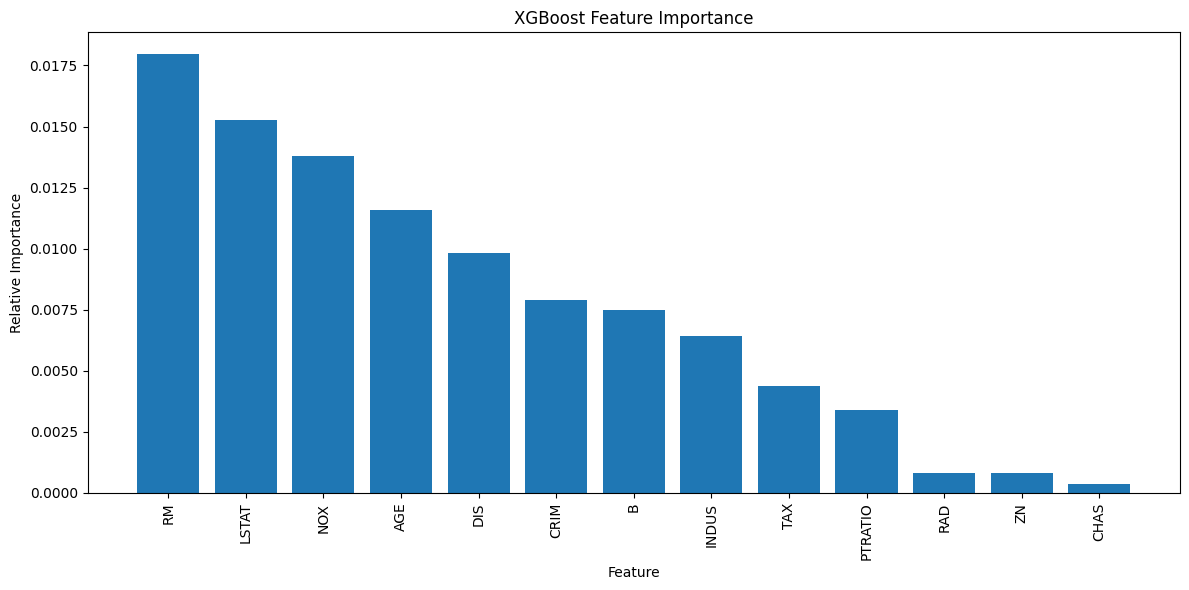

In [60]:
# Get feature names
feature_names = ds.drop('MEDV', axis=1).columns.tolist()

# Plot for Random Forest
plot_feature_importance(rf, feature_names, "Random Forest Feature Importance")

# Plot for XGBoost
plot_xgboost_feature_importance(xgb, feature_names, "XGBoost Feature Importance")

## Conclusion

This project demonstrates a complete workflow for solving a regression problem in housing price prediction. Key takeaways:

- **Data cleaning and normalization** are critical for ensuring reliable predictions.
- A **custom linear regression** model gives foundational insights into gradient descent.
- **Random Forest** and **XGBoost** offer improved accuracy due to their ensemble and boosting strategies.
- Among all, **XGBoost** typically achieves the best performance in terms of prediction accuracy and generalization.

This modular approach allows for further extensions like hyperparameter tuning, feature engineering, or deploying the best model into a web app for user interaction.